# Week 9: Chirps, Bells, and other Instruments

<font size="6"> Laboratory 8 </font> <br>
<font size="3"> Last updated March 6, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

### Mathematics 
- Laws of sines/cosines
    
### Programming Skills 
- specialized flow structures (`try`/`finally`, `for`/`else`)
- buffers
- the I2S protocol
- blocking code

## <span style="color:orange;"> 0. Required Hardware </span>
- Raspberry Pi Pico
- MicroUSB cable
- Breadboard
- Jumper wires (at least 5)
- [I2S speaker module](https://learn.adafruit.com/adafruit-max98357-i2s-class-d-mono-amp), with [8-ohm speaker](https://www.adafruit.com/product/1890) connected
- [Piano keypad module](https://github.com/AldenMB/Piano_Keypad)
- Optional:
  - additional buttons and wires

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Aidan Leib 

**Email:** pleib@purdue.edu

In [2]:
import numpy as np

# <span style="color:orange;"> 1. More on Amplitude Modulation: bell envelopes </span>  

In the last couple of labs, we have explored the modulation of a signal by multiplying it with a periodic signal, such as a sine wave or a triangular wave. We have explored how this changes the sound by listening to it. It was observed that, when the frequency of the carrier is low compared to that of the sound, modulating a sound is perceived as a periodical increase/decrease of the volume of the sound. Mathematically, we say that such modulation modifies the "envelop" of the signal. The envelop of a signal represents the maximal/minimal values between which the signal oscillates over time. (Yeah, his is not very precise, but giving a precise mathematical definition would just be sonfusing at this point. -pm) So amplitude modulation, which as the name indicates changes the amplitude of the signal, naturally changes the envelop of the signal. When the carrier value is very small at some point in time, the amplitude of the modulated signal is decreased, thus making the sound less loud at that moment. Conversely, if the carrier value is very large at some point in time, the amplitude of the modulated signal is decreased, thus making the sound louder at that moment. 

This visualization can inspire some more creative ways to modify sound. A fun example is created using "bell envelops" $ c(t) = e^{-t/\lambda}$, $\lambda > 0$, which decays the amplitude of the sound in an interesting fashion. The parameter $\lambda$ is called the "time constant" and controls the speed of the decay - larger the $\lambda$, faster the decay. So to recap, when a signal $x(t)$ is modulated by a bell envelop, the modulated signal $y(t)$ is given by:

$$  y(t)= e^{-t/\lambda} x(t), \text{ for some } \lambda >0. $$

### <span style="color:red"> Exercise 1 </span>

Create a middle C sound that lasts one second. You can use your prefered waveform (sine, triangular, square, etc.) to first create a middle C. Then modulate your middle C using a bell envelop. Experiment with different values of $\lambda$ and notice how this affects the final sound. 

In [3]:
from IPython.display import Audio

t = np.linspace(0, 1, 44100)
c = np.sin(2 * np.pi * 256 * t)

lam = 0.2
y = c * np.exp(-t/lam)

Audio(y, rate = 44100)

In [4]:
Audio(c, rate = 44100)

### <span style="color:red"> Exercise 2 </span>

Pick a value of $\lambda$, and then create an entire scale of notes that sound like bells. Use your scale to play a short song. (no need to be a fancy song, just 'do-re-mi-fa-so-la-ti-do' is enough. But if you feel creative, go for it!)

In [5]:
lam = 0.2

d = np.sin(2 * np.pi * 293 * t)
e = np.sin(2 * np.pi * 329 * t)
f = np.sin(2 * np.pi * 349 * t)
g = np.sin(2 * np.pi * 392 * t)
a = np.sin(2 * np.pi * 440 * t)
b = np.sin(2 * np.pi * 494 * t)
c_5 = np.sin(2 * np.pi * 523 * t)

scale = np.concatenate((c,d,e,f,g,a,b,c_5,b,a,g,f,e,d,c,c,e,g,c_5,g,e,c))
bells = scale * np.tile(np.exp(-t/lam), 22)

Audio(bells, rate = 44100)

Despite the type of the envelop used, the sounds you create do not quite sound like bells. In order to create bell sounds, we will need to use more than one sine wave frequency. So we move on to the next topic: frequency modulation. 

# <span style="color:orange;"> 2. Frequency Modulation: Chirps (linearly swept frequency) </span>  

We have explored different ways to modulate the amplitude of a signal, i.e. Amplitude Modulation (AM). One can also also modulate the frequency of a signal, i.e. Frequency Modulation (FM). If $x(t)$ is a single sine wave 

$$ x(t) = C \cos(2\pi f_0 t + \phi) \text{ for some } C, f_0, \phi \in {\mathbb R} ,$$

then, after frequency modulation, the modulated signal $y(t)$ can be written as

$$ y(t)= C \cos( \psi_{f_0, \phi} (t) )$$


for some  function $\psi_{f_0, \phi}(t)$ depending on $f_0$ and $\phi$ .

The instanteneous frequency at time $t$ of a signal of the form  $ y(t)= C \cos( \psi_{f_0, \phi} (t) )$ is given by the derivative of $\psi_{f_0, \phi}(t)$ divided by $2\pi$:
    
$$ f(t)= \frac{1}{2\pi} \frac{d \psi_{f_0, \phi}(t) }{dt}.$$

In particular, the instanteneous frequency $f(t)$ of the original signal $ x(t) = C \cos(2\pi f_0 t + \phi) $ is a constant:

$$ f(t)=  \frac{1}{2\pi}  \frac{d  \left( 2\pi f_0 t + \phi \right) }{dt}= f_0.$$

Now if we modulate the signal using the quadratic function $\psi_{f_0,\phi}= 2\pi a t^2 + 2\pi f_0 t + \phi $ with $a\neq 0$, then the instantenous frequency of the modulated signal varies linearly with time:

$$ f(t)= \frac{1}{2\pi}  \frac{d  \left(2\pi a t^2 + 2\pi f_0 t + \phi \right) }{dt}= 2at+f_0.$$

So the frequency of the modulated signal begins at $f_0$ at time $t=0$, and increases/decreases linearly at a rate (slope) of $2a$ per time unit. The sound produced by such a signal is similar to a bird chirp, hence the name "chirp".

### <span style="color:red"> Exercise 3 </span>

Create a chirp lasting 0.5 seconds with parameters $f_0=252$ and $\phi=0$. Experiment with different values of $a$.  

In [14]:
t = np.linspace(0, 1/2, 22050)

var_a = 10000
f_0 = 252
phi = 0

f = 2 * var_a * t * f_0
psi = 2 * np.pi * var_a * t**2 + 2 * np.pi * f_0 * t + phi
y = np.cos(psi)

Audio(y, rate=44100)

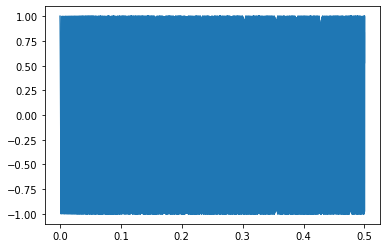

In [15]:
import matplotlib.pyplot as plt

plt.plot(t,y)

### <span style="color:red"> Exercise 4 </span>

Repeat Exercise 3, but this time begin your chirp at $t=-0.25$ and end it at $t=0.75$. What difference do you notice?

In [18]:
t = np.linspace(-0.25, 3/4, 44100)

var_a = 1000
f_0 = 252
phi = 0

f = 2 * var_a * t * f_0
psi = 2 * np.pi * var_a * t**2 + 2 * np.pi * f_0 * t + phi
y = np.cos(psi)

Audio(y, rate=44100)

when atrating at a negative value, the "chirp" begins to go lower at first, then gets higher in pitch after $t=0$

### <span style="color:red"> Exercise 5 </span>

Based on Exercise 3 and Exercise 4, how would you go about creating a chirp that sounds like a middle C? Explain your strategy and code it to check that it works. 

I believe I would just adjust $f_0$ so that it started at middle C.

In [30]:
t = np.linspace(0, 1, 44100)

var_a = 1000
f_0 = 261
phi = 0

f = 2 * var_a * t * f_0
psi = 2 * np.pi * var_a * t**2 + 2 * np.pi * f_0 * t + phi
c = np.cos(psi)

Audio(c, rate=44100)

### <span style="color:red"> Exercise 6 </span>

Similar to Exercise 2, create an entire scale of notes that sound like chirps. Use your scale to play a short song. (It can be the same song as for Exercise 2.)

In [31]:
var_a = 1000
phi = 0

d = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 293 * t + phi)
e = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 329 * t + phi) 
f = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 349 * t + phi)
g = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 392 * t + phi)
a = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 440 * t + phi)
b = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 494 * t + phi)
c_5 = np.cos(2 * np.pi * var_a * t**2 + 2 * np.pi * 523 * t + phi)

scale = np.concatenate((c,d,e,f,g,a,b,c_5,b,a,g,f,e,d,c,c,e,g,c_5,g,e,c))

Audio(scale, rate = 44100)

# <span style="color:orange;"> 3. Putting it all together: Synthesis of Bells and other Music Instruments </span>  

The previous examples have taught you how to synthesize a bell sound and a chirp using basic operations on the frequency and amplitude of a periodic signal. Hopefully, you have developed a bit of an intuition on how these simple operations change the sound you hear. Now we generalize these concepts to be able to synthesize more general music instruments. Following the technique proposed by Stanford Professor John Chowning in 1973, the general equation we will use for the sound of the instrument (one note) is

$$ y(t)= A(t)   $$

You will recognize the factor A(t) in front, which controls the envelop of the signal, as in amplitude modulation. You will also recognize the original signal

$$ x(t) = \cos(2\pi f_0 t + \phi) $$


In general the modulation of a signal $x(t)$ can be written as 

$$y(t)= A(t) \cos \left[ 2 \pi f_0 t + B(t) \cos \left( 2\pi f_1 t + \psi_1 \right)+\psi_0  \right].  $$

The function A(t) modifies the envelop of x(t), and as we have seen previously, can take on different forms (e.g. periodic, exponential, etc.). 
To understand the rest of the expression, we compute the instantenous frequency of $y(t)$:

\begin{align}
f(t) & = \frac{1}{2\pi}\frac{d}{dt} \left(  2 \pi f_0 t + B(t) \cos \left( 2\pi f_1 t + \psi_1 \right)+\psi_0\right),\\
& =  f_0 - B(t) f_1 \sin \left( 2 \pi f_1 t + \psi_1 \right) + \frac{1}{2\pi} B'(t) \cos \left( 2\pi f_1 t + \psi_1 \right).
\end{align}


So the frequency of $y(t)$ changes with time based on the value of $f_1$, called the modulating frequency, and the function $B(t)$, called the (frequency) modulation index envelop. For example, one can create a vibrato around the frequency $f_0$ using the frequency $f_1$. The function $B(t)$ is used to control what other frequency components are present in the signal. In future lab, we will learn how to analyze these frequency components using the DFT. For now, let's just have some fun and use this model to create a cool music instruments.    

### <span style="color:red"> Exercise 7 </span>

> Create bell sounds using the following parameters:
>
> $$ A(t) = e^{\frac{-t}{\lambda}}, B(t)= B_0 e^{\frac{-t}{\lambda}},  f_1= 2 f_0, $$
>
>
> with either
>
> a)  $f_0=110$, $B_0=10$, $\lambda=2$, duration  6 seconds 
>
> or 
>
> b)  $f_0=210$, $B_0=5$, $\lambda=2$, duration  6 seconds 
>
> or 
>
> c)  $f_0=110$, $B_0=10$, $\lambda=12$, duration  3 seconds 
>
>
> ```(Ref: DSP First, a Multimedia approach, p. 451) ```



### a)

In [33]:
f_0 = 110
B_0 = 10
lam = 2
n = 6

t = np.linspace(0, n, n * 44100)
A_t = np.exp(-t / lam)
B_t = B_0 * np.exp(-t / lam)
f_1 = 2 * f_0

y = A_t * np.cos(2 * np.pi * f_0 * t + B_t * np.cos(2 * np.pi * f_1 * t))

Audio(y, rate=44100)

# <span style="color:orange;"> 4. Update your synthesizer </span>

### <span style="color:red"> Exercise 8 </span>

Now that you know how to create cool sounds, modify the synthesizer you built in Lab 2, and make it play your own unique notes. You can use the previously synthesized bells or chirps, or create your own personal combination of parameters.

When you are done, show it to your instructor. 

In [34]:
import pandas as pd

In [66]:
scale = pd.read_csv('my_scale.csv')
scale.rename(columns={'Unnamed: 0':'note'}, inplace=True)
scale.set_index('note', inplace=True)
scale

Correct frequency  Samples per cycle  Rounded  Approximation frequency  \
note                                                                           
C            261.625565          84.280754     84.0               261.462451   
C#           277.182631          79.550439     79.0               277.358491   
D            293.664768          75.085616     75.0               294.000000   
D#           311.126984          70.871384     71.0               310.563380   
E            329.627557          66.893679     67.0               329.104478   
F            349.228231          63.139225     63.0               350.000000   
F#           369.994423          59.595493     59.0               369.553073   
G            391.995436          56.250655     56.0               392.000000   
G#           415.304698          53.093548     53.0               416.037736   
A            440.000000          50.113636     50.0               441.000000   
A#           466.163762          47.300974     47.0               465.845070   
B            493.883301          44.646174     44.0               493.656716   

      Difference (cents)  Friendly Cycles  
note                                       
C              -1.079703              3.0  
C#              1.098040              2.0  
D               1.975158              1.0  
D#             -3.138957              1.0  
E              -2.749442              1.0  
F               3.821678              1.0  
F#             -2.066346              3.0  
G               0.020157              4.0  
G#              3.053041              1.0  
A               3.930158              1.0  
A#             -1.183956              3.0  
B              -0.794442              3.0

Wave and bytes for C:
b'M\xca\xce\xc5\x03+\x90\xc7\r7?\xd4[/\xac\x10\xa7\xd2\xb3"^\x19\x96\x05\x14\xea\x06\x01\x1d\x19G\xf0\xac\x00\xb7\x17\xa2\xe1B\xf0\xb2\xe2;\xe8\xfd\x0b\xdc\xf5\xc6\xf3\xb4\xed\x8a\xf0T\xed\xe7\xee\xda\x14/\xf6]\xec\x16\x02\xa9\xf0\xc8\xf9\xb5\x02t\x0e\xa6\xf9\x8e\xf1\x08\x0bF\xf2\xe9\xff\xaf\n|\x04h\xfd\xf6\xf6B\x0b\xf8\xf4\xf7\x018\n\xb7\xfde\x005\xfa\x9e\x08\xd8\xf7@\x02^\x07\xf3\xfaH\x02\xe1\xfb\xff\x05I\xfa\xef\x01\xc2\x04\xb5\xfa#\x03\xbe\xfc!\x04\x17\xfc~\x01\xf0\x02\x88\xfbA\x03B\xfd\xee\x02R\xfd\x1c\x01\xca\x01\x95\xfc\xf3\x02\xa7\xfd/\x02\x1f\xfe\xd2\x00\x15\x01\x85\xfdy\x02\x01\xfe\xb2\x01\xa2\xfe\x9f\x00\xa7\x00@\xfe\xf7\x01U\xfe[\x01\xf7\xfe|\x00b\x00\xc9\xfe\x83\x01\xa3\xfe\x1a\x010\xffe\x007\x00+\xff#\x01\xe8\xfe\xe6\x00X\xffU\x00\x1b\x00o\xff\xd7\x00$\xff\xba\x00w\xffI\x00\n\x00\x9f\xff\x9d\x00V\xff\x96\x00\x90\xff?\x00\xff\xff\xc0\xffq\x00~\xffx\x00\xa4\xff6\x00\xf8\xff\xd7\xffQ\x00\x9d\xff^\x00\xb5\xff/\x00\xf5\xff\xe7\xff9\x00\xb6\xffJ\x00\xc3\xf

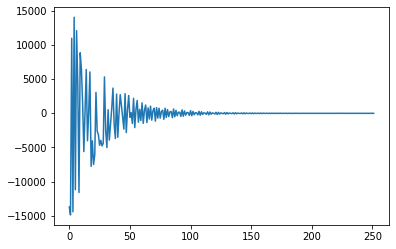

Wave and bytes for C#:
b'M\xca\x9a\xe1m\xeeE4E\xf1\xda3\xb3-M\xd0+\x0f\x8e\x1e\x13\xe6K\xd7\x89\xe3\t&a\xdbA\x1b\xa1\x1d\x89 \x18\xf5\xdd\x00\r\x08\xdc\xe4*\xf2\xc3\xe9\xd7\xf1K\x16\xbd\x08\x00\xfa\xa6\x02!\x14\xee\xfa\xda\xf0l\x08~\x0f\xee\x0c\xb1\x00\xcc\xf27\xf2\x18\xf5(\xf3\xa0\xf5\x17\x05\xd1\x0b\xec\x031\xfe\xb0\xfeH\x03\xe3\x07W\t\x1a\t\x18\x08\xa2\x03\xfe\xfb@\xf88\xfa\xdb\xfcv\xfdt\xfc5\xfb\xae\xfa\xf6\xfaM\xfc>\xff\xe1\x02\xda\x04\x8d\x04}\x03\xdf\x02\xd3\x02\xf6\x02\xed\x02\x7f\x02w\x01\xcd\xff\x06\xfe\xfc\xfc\xe8\xfcR\xfd\xbb\xfd\xfa\xfd%\xfe_\xfe\xca\xfe}\xffk\x00S\x01\xe3\x01\x02\x02\xd9\x01\x9b\x01b\x01-\x01\xef\x00\x99\x00$\x00\x9d\xff!\xff\xd0\xfe\xb7\xfe\xc6\xfe\xea\xfe\x14\xff@\xffs\xff\xb2\xff\xfd\xffL\x00\x92\x00\xc1\x00\xd3\x00\xcc\x00\xb8\x00\x9c\x00{\x00U\x00*\x00\xfa\xff\xca\xff\xa1\xff\x85\xffy\xff|\xff\x88\xff\x9a\xff\xb1\xff\xcc\xff\xe9\xff\x07\x00%\x00=\x00N\x00V\x00U\x00N\x00B\x002\x00!\x00\r\x00\xfa\xff\xe8\xff\xd8\xff\xce\xff\xc9\xff\xc9\xff\xce\xff\xd5\

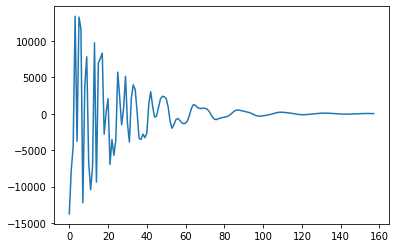

Wave and bytes for D:
b'M\xca\xb9;M:\x03\xfb\x863\xe6\xf2<\x13\xf5\x1c\xc2+\x8c+$)G\xeaG\xf1\x16\xf6-#i\x0e\x92\xe14\xe1\x0c\xe2k\x1b\xcd\xees\xe5\xa4\xecG\xef\xd3\x13\x8b\xe9\xc3\xea\xd9\xfe\xc0\xfe\xad\x0c\xf7\xf1\xe9\xee.\n\xf5\x06\x9f\x06\x16\xfb\x00\xf2\xf6\x0c\x86\t\x1d\x02\xca\x00\x85\xf4\xc1\nW\t1\xffk\x03\xc0\xf6\x0e\x07.\x08\x95\xfd4\x04\xc6\xf8\xbb\x03\xd7\x06\xe7\xfc\x15\x04\x92\xfa[\x01\x9d\x05\xcd\xfc\x98\x03\x18\xfc\xe6\xff\x91\x04\x02\xfd\x00\x03S\xfd\x1d\xff\xb5\x03\\\xfdl\x02E\xfe\xc3\xfe\x01\x03\xbf\xfd'


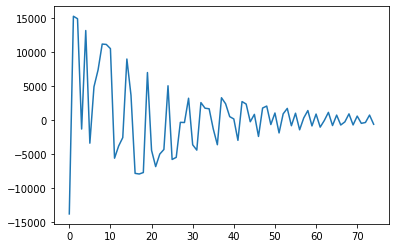

Wave and bytes for D#:
b"M\xcai6\xaa8\x167\x8e5\x8d2\xc9\x0b~\xd8q\x14\xb2'\xb7\x12z\x04\xcd\xf2\xe5\xdc\xc0\xff\x04\x0eR\x00d\xe4\x00\x0c\xce\x19\x8c\xf2\xa4\xf6\xd4\x0e\x9f\xf9\x1f\xf2\xe6\x12\x7f\x08\xb6\xed\x81\x00N\x0c\xfe\xf06\r!\xf9l\xfc\xd6\x0bh\xf2\x01\x0c\xb7\xf4\xcd\x0b\xd0\xf5?\x03\xcf\x05\x18\xf6\xdf\x07\xf0\xfb\xb8\x01\x99\xfe\x88\x02\xca\xfb\x8f\x05\xd5\xf9&\x06Y\xfa|\x04\xab\xfdf\xffU\x030\xfb\xe2\x04\xd3\xfbg\x03\x17\xfd\xb7\x02N\xfd\xb1\x02g\xfdW\x02#\xfe \x01\xda\xff\x19\xff"


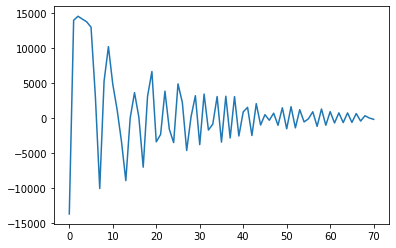

Wave and bytes for E:
b'M\xcau\xcd\x848\xee\xd8\xc5\xfa!\xce\x90\xd9u\xd2\x9f\xde\xbe\xf2/\x134\x1f\xca\xe9\xb4\xee\x8c \xae\x0fH\x166\x05K\x03\r\x1a\xf7\xedG\x16h\xea<\xea\xbb\x14\x08\xefP\xfb\x95\xf2\xec\x0e\x8d\x03\xaa\xfa0\r)\r\xb1\x03\xa5\xf9\xff\t\x1a\xfc\xf3\xf4\xad\xf5\xb4\xfe^\xfe\xf8\xf6\x8a\x05n\x08(\x06\x06\x02\x91\x05Y\x04D\xfb9\xfa,\xfc\xd9\xfcr\xfa\xc2\xfe\x8b\x03\xce\x03\xe7\x02\x97\x03\xe4\x03\xe0\xffv\xfda\xfdv\xfd\xc1\xfc\xc2\xfd\x95\x00\xd4\x01'


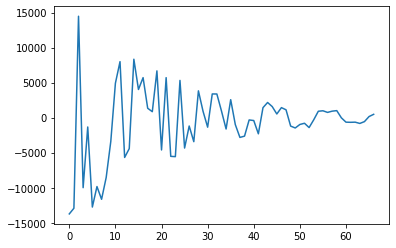

Wave and bytes for F:
b'M\xca\xb5<\x0b64\x1f\xa0\xccv\rA$\xf3+{\xd5\xe0\xdf@\xd9l\x1bV\xf4\xcd \x9b\xf9\x0e\x1e\x94\xe7\xdf\xf9\xb5\xee\'\x0e\xf7\n\x83\xfd\t\xfc{\xf4"\x0e\xda\xfb\x11\n\x90\xef3\tD\xf8\x96\r\xae\xf4\x18\x05\xb1\xf6O\x0b\x85\xfd\x81\x05\xe4\xf5\'\x00E\xfdx\x08\xb5\x01\xee\x00(\xf9\xfa\xfc \x00t\x05\xcc\x03N\xff\xa5\xfb\xe5\xfb\xf5\x00\x89\x03\x10\x04\xf6\xfe\x11\xfd9\xfc\x06\x01\x7f\x02]\x03\n\xff\xd4\xfd\x1b\xfd'


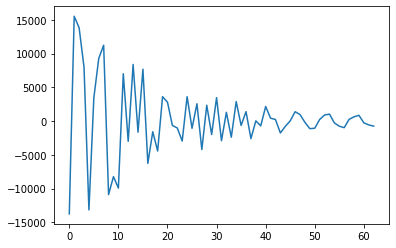

Wave and bytes for F#:
b'M\xca\xb73\x88\xee\xb74\xb5\x1f\xf3\tx-\xa4%\x89\xfe\xd8\xeag \xaf"\x97\xe8-\xe1\x05\xe3\x82\xf3\x84\x18\x1b\xe9\xcf\xef\xc0\xe8\xf1\xe9\xe4\x0e\x87\xfc\xa0\x04X\xee\xe0\xf4\xd5\x06\x99\x06\x95\x0cc\xf2x\xfeC\x01\xe3\x08\xe7\n\x8e\xf5\xd9\x02+\xfe\x1c\x08z\x06@\xf8\x00\x04\xe5\xfc\x9d\x06\xc4\x02\x8a\xfa\xc8\x03\xb1\xfc.\x05}\x00c\xfc!\x03\x00\xfd\x00\x04[\xff\xc6\xfdm\x02|\xfd\x12\x03\xe9\xfe\xbf\xfe\xce\x01\xfc\xfd[\x02\xd3\xfec\xffM\x01m\xfe\xce\x01\xe8\xfe\xc8\xff\xe8\x00\xcb\xfea\x01\x0e\xff\x02\x00\x9c\x00\x17\xff\x0e\x016\xff!\x00f\x00S\xff\xce\x00[\xff.\x00?\x00\x81\xff\x9d\x00|\xff2\x00$\x00\xa4\xffw\x00\x97\xff0\x00\x12\x00\xbe\xffZ\x00\xad\xff+\x00\x07\x00\xd2\xffC\x00\xbf\xff&\x00\x00\x00\xe0\xff2\x00\xcd\xff \x00\xfd\xff\xeb\xff%\x00\xd9\xff\x1b\x00\xfb\xff\xf2\xff\x1b\x00\xe2\xff\x16\x00\xfa\xff\xf7\xff\x14\x00\xe9\xff\x12\x00\xfa\xff\xfb\xff\x0e\x00\xef\xff\x0e\x00\xfa\xff\xfd\xff\n\x00\xf3\xff\x0b\x00\xfb\xff\xff\xff\x07\x00\xf6\xff\t\x00\xfb\xf

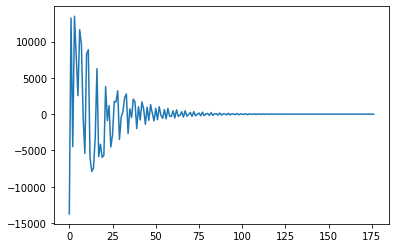

Wave and bytes for G:
b'M\xca\xc9\xc6\xb1\x03\xdc5\xcf\xf0\xd5\xd7\x8a"\xda\x16\xe2\xdd\x17\xe3\xc9\x06\x97\x1b\xfb\x1f\xd7\x1e\xee\x1c\xfb\x18\xde\x0fQ\x01{\xf2\xaf\xea\xf1\xec\xd5\xf5\x96\xff\x90\x06\'\n6\x0b\x9c\n\xb6\x08\x87\x050\x01Z\xfc/\xf8\xe8\xf5\x19\xf6g\xf8\xcd\xfb8\xff\xf5\x01\xcb\x03\xd2\x04C\x05U\x05/\x05\xe9\x04\x8f\x04,\x04\xc6\x03e\x03\x11\x03\xcf\x02\xa1\x02\x89\x02\x83\x02\x8a\x02\x98\x02\xa3\x02\xa5\x02\x98\x02w\x02C\x02\xfd\x01\xac\x01U\x01\xfe\x00\xad\x00e\x00\'\x00\xf5\xff\xcc\xff\xac\xff\x93\xff\x81\xffs\xffi\xffa\xff[\xffW\xffT\xffS\xffS\xffT\xffX\xff]\xffe\xffn\xffy\xff\x86\xff\x93\xff\xa1\xff\xb0\xff\xbe\xff\xcc\xff\xd9\xff\xe5\xff\xf0\xff\xfa\xff\x02\x00\n\x00\x11\x00\x16\x00\x1b\x00\x1f\x00!\x00$\x00%\x00&\x00&\x00&\x00%\x00#\x00"\x00 \x00\x1d\x00\x1b\x00\x18\x00\x15\x00\x12\x00\x0f\x00\x0c\x00\n\x00\x07\x00\x05\x00\x02\x00\x00\x00\x00\x00\xfe\xff\xfd\xff\xfb\xff\xfa\xff\xfa\xff\xf9\xff\xf9\xff\xf8\xff\xf8\xff\xf8\xff\xf8\xff\xf9\xff\xf9\xff\xf9\xff\xfa\xff

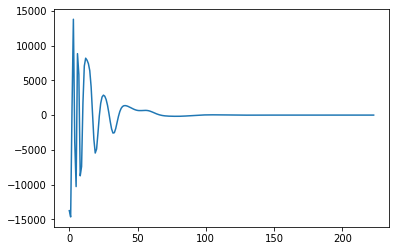

Wave and bytes for G#:
b'M\xca\xbd\x04M\n\x86\xd2\xaa\x1ak\xd0\xab\x1b\xee\xdb\xdd W\xfca"/!\xdd\xf8\xb0\xed\xa8\xf0\xf0\x0e\xf1\x0f\x88\xea\xf7\xf9-\x11\xfd\xf6\xaf\x04\x01\x11\xa6\xef\x84\xf3\xb6\x06\x04\x04N\x05\xf7\x00\x1d\xf6?\xfe\xfb\t\xc5\xff\x04\xf7\x87\x03\xda\x07\xc3\xf9u\xf9\xba\x06 \x05\x08\xfb\x1b\xfcX\x02\x1d\x03\xda\xff.\xfd\xd6\xfe\xde\x02\xc0\x01\xfc\xfc\x19\xfe\x06\x03\xd8\x01'


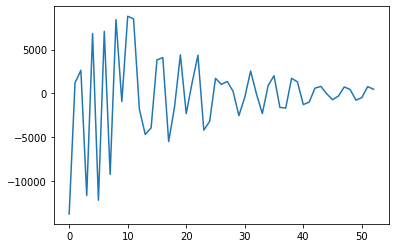

Wave and bytes for A:
b'M\xca\x19<F\xf7\xb6)\x17\xcf\xa1\xd1\xb2\xe8\x82#&\x1do\xe1h\xe7\xf1\xdf\x9d\xff#\x07~\xec\xed\xe9\xd1\xf2\xc5\xeaO\xff2\x12a\xf5U\x0e=\xf7h\xf5\x0c\xf7\xfb\x0cI\xfdO\n\xfe\n:\xfd`\xf6\x0f\x01\x1e\xff\xb4\xf9:\x07\xa9\x06\t\xfd\x87\xfd\x89\x03G\xfb\xc3\xfb&\x04\x99\x027\xfd\xa9\x01\xb9\x02s\xfc\xfa\xfd\x9b\x02\xe5\xff'


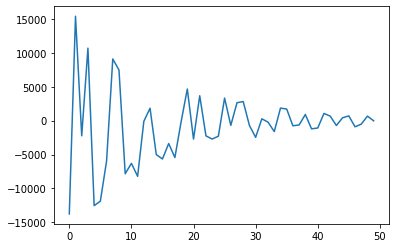

Wave and bytes for A#:
b'M\xca\x0f\xdbz\xd0\xd0.0#\xa3-\xf6\xda\xcb\xfd:\xf6z\x10\xe0\xe4\xb8\xfc\xf1\xe5*\x1a\x83\x18\xf8\xfe\x90\x00T\xfb\x00\xfe\xb3\xf2\xfa\xf10\xf4\xa4\xf5\xd1\x05n\xf3?\xff\x8f\n\xeb\xf93\x08\x1f\t\xab\xfd,\x079\x07\x81\xfd\x91\x010\x05\xeb\xfbE\xfe\x88\x03[\xfbp\xfd\xba\x02\x8d\xfc\x9c\xfd\x94\x02`\xfe\x00\xfe\x8f\x02\xbb\xffO\xfeC\x02k\x00z\xfe\xa7\x01\xaf\x00\x94\xfe\xf6\x00\xc2\x00\xb5\xfef\x00\xc4\x00\xec\xfe\x07\x00\xbf\x004\xff\xd2\xff\xb4\x00\x7f\xff\xb6\xff\xa0\x00\xbd\xff\xa9\xff\x84\x00\xec\xff\xa6\xffc\x00\t\x00\xaa\xffB\x00\x1c\x00\xb4\xff%\x00&\x00\xc1\xff\x0f\x00)\x00\xd0\xff\x00\x00(\x00\xdf\xff\xf6\xff$\x00\xec\xff\xf0\xff\x1e\x00\xf7\xff\xee\xff\x17\x00\xff\xff\xed\xff\x10\x00\x03\x00\xef\xff\n\x00\x07\x00\xf2\xff\x05\x00\x08\x00\xf5\xff\x01\x00\x08\x00\xf8\xff\xff\xff\x08\x00\xfb\xff\xfe\xff\x07\x00\xfe\xff\xfd\xff\x05\x00\xff\xff\xfc\xff\x04\x00\x00\x00\xfd\xff\x02\x00\x01\x00\xfd\xff\x01\x00\x01\x00\xfe\xff\x00\x00\x01\x00\xfe\xff\x00\x00\x01\

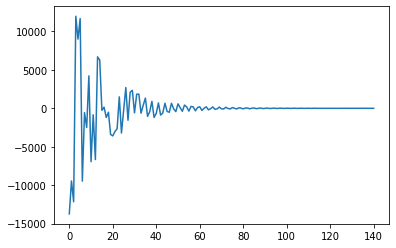

Wave and bytes for B:
b'M\xca\x885B#x\xf6\xd3\xd9]\xd4\xcc\xfcB&\x8c\xe0\x84\x1c\xac\xe0y\x10\xb4\x11\x1b\xeb\x1f\xf5g\x159\xfae\xf7\xd5\r\t\xf2\x9d\x0b\n\xf9\x93\x00t\x05\xde\xf6B\n\x0b\xf6M\tq\xf7[\x07\xd0\xfa\x0f\x02M\x01\x1a\xfc,\x05\xbe\xfa\xae\x04\x10\xfcO\x03!\xfd\x98\x02\x97\xfdB\x02\xe9\xfd\xe2\x01b\xfeI\x01\x1c\xffs\x00\x01\x00\x90\xff\xcd\x00\xf0\xfe7\x01\xbb\xfe?\x01\xd4\xfe\x12\x01\n\xff\xd8\x00D\xff\x9f\x00}\xffg\x00\xb4\xff0\x00\xeb\xff\xfd\xff\x19\x00\xd3\xff<\x00\xb9\xffN\x00\xb0\xffP\x00\xb3\xffG\x00\xbf\xff9\x00\xcf\xff)\x00\xdf\xff\x19\x00\xef\xff\t\x00\xfe\xff\xfd\xff\x08\x00\xf4\xff\x10\x00\xee\xff\x14\x00\xec\xff\x14\x00\xed\xff\x12\x00\xf0\xff\x0e\x00\xf4\xff\n\x00\xf8\xff\x06\x00\xfc\xff\x02\x00\x00\x00\xff\xff\x02\x00\xfd\xff\x04\x00\xfc\xff\x05\x00\xfb\xff\x05\x00\xfb\xff\x04\x00\xfc\xff\x03\x00\xfd\xff\x02\x00\xfe\xff\x01\x00\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\xff\xff\x01\x00\xff\xff\x01\x00'


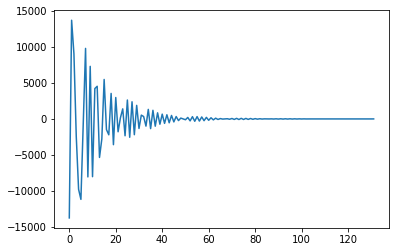

In [77]:
f_0 = 110
B_0 = 10
lam = 2
n = 6

notes = scale.index

waves = {}
for note in notes:
    
    f_0 = scale.loc[note, 'Correct frequency']
    f_1 = 2 * f_0
    
    t = np.linspace(
            0, 
            scale.loc[note, 'Friendly Cycles'] * 2 * np.pi, 
            int(scale.loc[note, 'Friendly Cycles'] * scale.loc[note, 'Rounded']), 
            endpoint=False
        )
    
    A_t = np.exp(-t / lam)
    B_t = B_0 * np.exp(-t / lam)
    
    waves[note] = 2**14 * A_t * np.cos(2 * np.pi * f_0 * t + B_t * np.cos(2 * np.pi * f_1 * t))
    
for note, wave in waves.items():
    
    print(f"Wave and bytes for {note}:")
    print(wave.astype(np.int16).tobytes())
    
    plt.plot(wave)
    plt.show()

I wasn't able to show my actual synthesizer in class, but hopefully these byte strings and plots are enough. All I would need to do is copy over the byte strings to the `synth.py` file and wire up the synth again.

## <span style="color:green;"> Reflection </span>

Do not skip this section! Lab will be graded only on completion of this section.

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I think I did all of this lab pretty well, I was unsure about the FM part with the chirps, but I checked my work and it seems to be correct.
2. I learned about the big difference between FM and AM broadcast signals/modulations.
3. I think maybe the chirp seciton could use some more background and an example so we know what it should sound like.
4. See (3) above.